# 데이터 분석 준비하기

* 데이터 출처 : https://github.com/youngwoos/Doit_R/#91

# 패키지 설치 및 로드하기

In [1]:
install.packages("foreign")

Warning message:
"package 'foreign' is not available (for R version 3.6.1)"

In [2]:
# 패키지 설치
install.packages("foreign")

# 로드하기
library(foreign) # SPSS 파일 불러오기
library(dplyr)    # 전처리
library(ggplot2) # 시각화
library(readxl)  # 엑셀 파일 불러오기


Warning message:
"package 'foreign' is not available (for R version 3.6.1)"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# 데이터 불러오기

In [3]:
# 데이터 불러오기
raw_welfare <- read.spss(file='Koweps_hpc10_2015_beta1.sav',
                        to.data.frame = T)    # to.data.frame = T  SPSS 파일을 데이터 프레임 형태로 변환하는 기능

# 복사본 만들기
welfare <- raw_welfare


Warning message in read.spss(file = "Koweps_hpc10_2015_beta1.sav", to.data.frame = T):
"Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"

In [4]:
welfare <- rename(welfare, sex = h10_g3, birth = h10_g4, marriage = h10_g10, religion = h10_g11, income = p1002_8aq1, code_job = h10_eco9, code_region = h10_reg7)


# 데이터 분석 절차

1단계 : 변수 검토 및 전처리  
- 변수의 특성을 파악하고 이상치를 정제한 다음 파생변수 만들기  
  
2단계 : 변수 간 관계 분석  
- 데이터를 요약한 표를 만든 후 분석 결과를 쉽게 이해할 수 있는 그래프 만들기

In [5]:
# 변수 검토하기
class(welfare$sex)
# class() = 변수의 타입을 확인하는 함수


[1] "numeric"

In [6]:
# 이상치 확인
table(welfare$sex)


   1    2 
7578 9086 

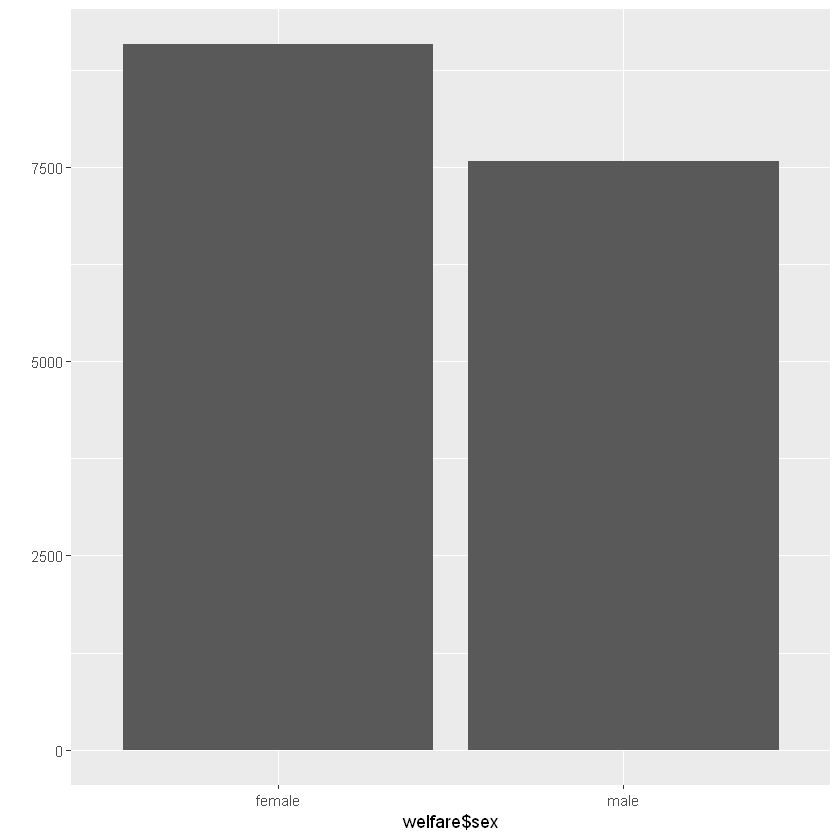

In [8]:
# 성별 항목 이름 부여
welfare$sex <- ifelse(welfare$sex == 1, "male", "female")
qplot(welfare$sex)

In [10]:
class(welfare$income)

[1] "numeric"

In [11]:
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12030 rows containing non-finite values (stat_bin)."

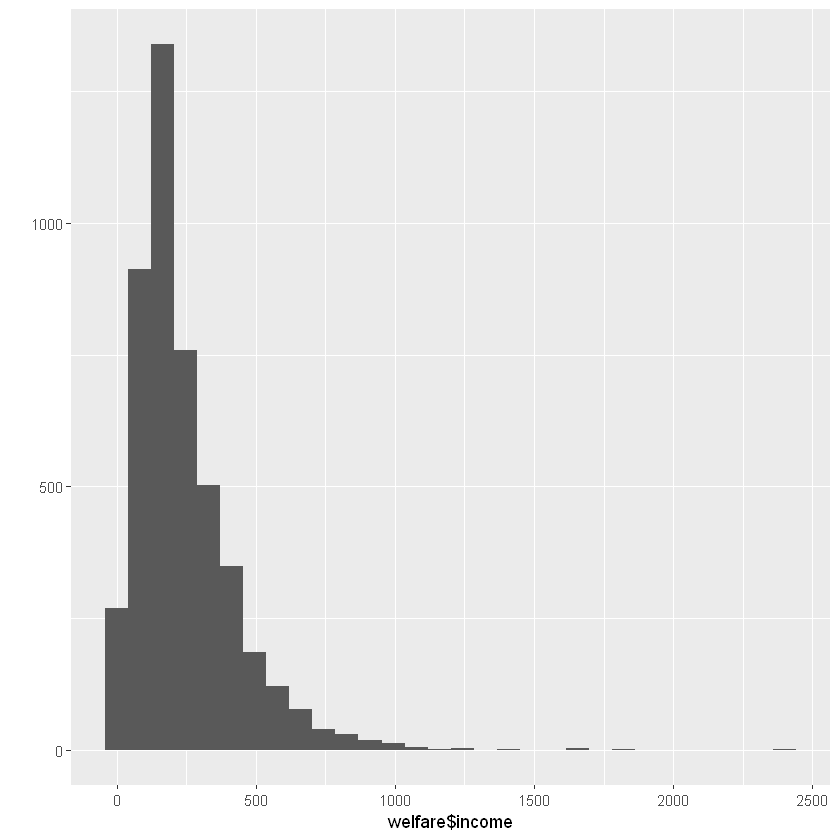

In [12]:
qplot(welfare$income)

In [13]:
# 이상치 결측 처리
welfare$income <- ifelse(welfare$income  %in% c(0, 9999), NA, welfare$income)

# 결측치 확인
table(is.na(welfare$income))


FALSE  TRUE 
 4620 12044 

In [14]:
# 성별 월급 평균표 만들기
sex_income <- welfare  %>% 
    filter(!is.na(income))  %>%
    group_by(sex)  %>% 
    summarise(mean_income = mean(income))
sex_income

sex,mean_income
female,163.2471
male,312.2932


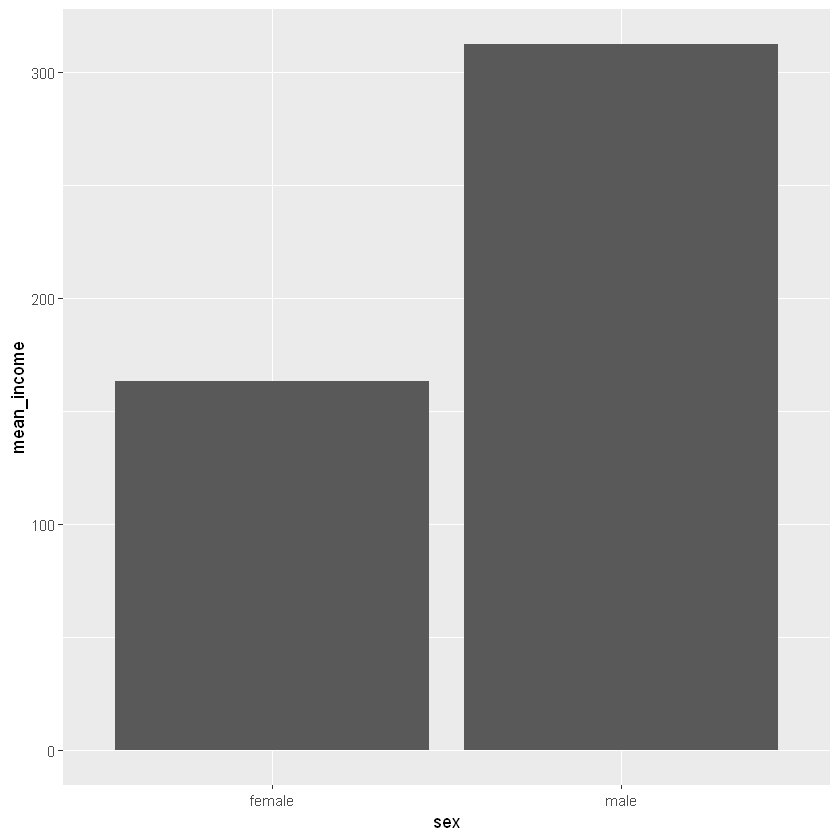

In [17]:
ggplot(data = sex_income, aes(x = sex, y = mean_income)) + geom_col()